Importanto bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 


# Introdução


**Contextualização**

Para critério de comparação com a pesquisa realizada por ______, realizada em 2008, selecionaram-se os mesmos dados de todas as capitais brasileiras para o ano de 2010, com a adição de alguns outros para melhor análise exploratória da disseminação de Tuberculose nessas cidades. O dicionário com breve explicação do que cada uma das colunas finais significam está a seguir.

- *Capital:* Cada uma das 26 capitais brasileiras;
- *Pop. Residente:* População que residia na capital;
- *Codigo da Capital:* Código fornecido pelo IBGE para cada cidade;
- *Sigla da Unidade da Federação:* Sigla do Estado no qual essa cidade é capital;
- *Nome das Grades Regiões:* Região em que tal cidade está situada;
- *IDHM 2010:* Índice de Desenvolvimento Humano Municipal, uma medida calculada a partir de fatores como educação, longevidade e renda, variando de 0 a 1. Quão maior esse indicador, melhores são as condições de qualidade de vida. Considera-se o Índice de Desenvolvimento Humano alto valores acima de 0.8;
- *Emigrantes de Países Estrangeiros:* Quantidade de pessoas vindas de fora do Brasil que habitam a respectiva cidade;
- *Obtos Tuberculose:* Coeficiente de óbitos causados pela tuberculose por 100.000 habitantes.
- *Coef. de Aids*: Obtos por Aids a cada 100 mil habitantes.
- *Indice Gini*: Indicador numérico que reflete a desigualdade de distribuição de renda entre a população de cada cidade, variando de 0 a 1. 

- ***Porcentagem de pobres:*** O salário mínimo do último ano para o qual a série está sendo calculada torna-se a referência para toda a série. Esse valor é corrigido para todos com base no INPC de julho de 2010, alterando o valor da linha de pobreza e consequentemente a proporção de pobres. Nesta tabela, o valor de referência, salário mínimo de 2010, é de R$ 510,00.
- ***Taxa de incidencia de Tuberlose:***
Taxa de incidência: casos por 100.000 habitantes
Informações apresentadas segundo local de residência e ano do diagnóstico; considerados os casos com tipo de entrada igual a "caso novo" ou "não sabe".
Situação da base de dados em novembro/2013. Dados de 2001 a 2010 atualizados em realização ao IDB anterior.
Nas tabulações por faixa etária ou sexo, estão suprimidos os casos com faixa etária ou sexo ignorados, respectivamente.
- ***Indice Gini:***


**Tema e Objetivo**


**Base de Dados**


#### **Limpando os Dataframes extraídos do DataSUS**

Importando os Dataframes:

In [2]:
desemprego0 = pd.read_excel('planilhas capitais/%_desemprego.xlsx')
pobres_brancos_negros0 = pd.read_excel('planilhas capitais/%_pobres_brancos_negros2.xlsx')
indice_gini0 = pd.read_excel('planilhas capitais/Indice_Gini_2010.xlsx')
aids0 = pd.read_excel('planilhas capitais/Coef_ObtosPorAids.xlsx')
analfabetismo0 = pd.read_excel('planilhas capitais/%_anafabetismo.xlsx')
turbeculoseobtos0 = pd.read_excel('planilhas capitais/Coef_ObtosPorTurbeculose.xlsx')
IDH0 = pd.read_excel('planilhas capitais/IDH_IBGE.xlsx')
pop_total0 = pd.read_excel('planilhas capitais/Pop_Residente.xlsx')
migracao0 = pd.read_excel('planilhas capitais/Migracao_2010.xlsx')

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
#ESTAÇÕES METEREOLÓGICAS
Brasilia = pd.read_excel('estações capitais\INMET_CO_DF_A001_BRASILIA_01-01-2010_A_31-12-2010.xlsx')
Goiana= pd.read_excel('estações capitais\INMET_CO_GO_A014_GOIAS_01-01-2010_A_31-12-2010.xlsx')
Campo_Grande = pd.read_excel('estações capitais/INMET_CO_MS_A702_CAMPO GRANDE_01-01-2010_A_31-12-2010.xlsx')
Cuiaba= pd.read_excel('estações capitais\INMET_CO_MT_A901_CUIABA_01-01-2010_A_31-12-2010.xlsx')
Rio_Branco = pd.read_excel('estações capitais\INMET_N_AC_A104_RIO BRANCO_01-01-2010_A_31-12-2010.xlsx')
Manaus = pd.read_excel('estações capitais\INMET_N_AM_A101_MANAUS_01-01-2010_A_31-12-2010.xlsx')
Belem = pd.read_excel('estações capitais\INMET_N_PA_A201_BELEM_01-01-2010_A_31-12-2010.xlsx')
Porto_Velho= pd.read_excel('estações capitais\INMET_N_RO_A938_VILHENA_01-01-2010_A_31-12-2010.xlsx')
Boa_vista = pd.read_excel('estações capitais\INMET_N_RR_A135_BOA VISTA_26-08-2010_A_31-12-2010.xlsx')
Palmas= pd.read_excel('estações capitais\INMET_N_TO_A009_PALMAS_01-01-2010_A_31-12-2010.xlsx')
Maceio= pd.read_excel('estações capitais\INMET_NE_AL_A303_MACEIO_01-01-2010_A_31-12-2010.xlsx')
Salvador = pd.read_excel('estações capitais\INMET_NE_BA_A401_SALVADOR_01-01-2010_A_31-12-2010.xlsx')
Fortaleza = pd.read_excel('estações capitais\INMET_NE_CE_A305_FORTALEZA_01-01-2010_A_31-12-2010.xlsx')
Sao_luiz = pd.read_excel('estações capitais\INMET_NE_MA_A203_SAO LUIS_01-01-2010_A_31-12-2010.xlsx')
Joao_Pessoa = pd.read_excel('estações capitais\INMET_NE_PB_A320_JOAO PESSOA_01-01-2010_A_31-12-2010.xlsx')
Recife = pd.read_excel('estações capitais\INMET_NE_PE_A301_RECIFE_01-01-2010_A_31-12-2010.xlsx')
Teresina= pd.read_excel('estações capitais\INMET_NE_PI_A312_TERESINA_01-01-2010_A_31-12-2010.xlsx')
Natal = pd.read_excel('estações capitais\INMET_NE_RN_A304_NATAL_01-01-2010_A_31-12-2010.xlsx')
Aracaju = pd.read_excel('estações capitais\INMET_NE_SE_A409_ARACAJU_01-01-2010_A_31-12-2010.xlsx')
Curitiba = pd.read_excel('estações capitais\INMET_S_PR_A807_CURITIBA_01-01-2010_A_31-12-2010.xlsx')
Porto_Alegre = pd.read_excel('estações capitais\INMET_S_RS_A801_PORTO ALEGRE_01-01-2010_A_31-12-2010.xlsx')
Florianopolis = pd.read_excel('estações capitais\INMET_S_SC_A806_FLORIANOPOLIS_01-01-2010_A_31-12-2010.xlsx')
Vitoria = pd.read_excel('estações capitais\INMET_SE_ES_A612_VITORIA_01-01-2010_A_31-12-2010.xlsx')
Belo_Horizonte= pd.read_excel('estações capitais\INMET_SE_MG_A521_PAMPULHA_01-01-2010_A_31-12-2010.xlsx')
Rio_de_Janeiro = pd.read_excel('estações capitais\INMET_SE_RJ_A652_FORTE DE COPACABANA_01-01-2010_A_31-12-2010.xlsx')
Sao_Paulo = pd.read_excel('estações capitais\INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2010_A_31-12-2010.xlsx')

In [4]:
dic_cidades = {
    'Brasília': Brasilia,
    'Goiânia': Goiana,
    'Campo Grande': Campo_Grande,
    'Cuiabá': Cuiaba,
    'Rio Branco': Rio_Branco,
    'Manaus': Manaus,
    'Belém': Belem,
    'Porto Velho': Porto_Velho,
    'Boa Vista': Boa_vista,
    'Palmas': Palmas,
    'Maceió': Maceio,
    'Salvador': Salvador,
    'Fortaleza': Fortaleza,
    'São Luís': Sao_luiz,
    'João Pessoa': Joao_Pessoa,
    'Recife': Recife,
    'Teresina': Teresina,
    'Natal': Natal,
    'Aracaju': Aracaju,
    'Curitiba': Curitiba,
    'Porto Alegre': Porto_Alegre,
    'Florianópolis': Florianopolis,
    'Vitória': Vitoria,
    'Belo Horizonte': Belo_Horizonte,
    'Rio de Janeiro': Rio_de_Janeiro,
    'São Paulo': Sao_Paulo
}

In [5]:
def deleta_colunas(dic_cidades):
    dic_cidades2 = {}
    for cidade, dataframe in dic_cidades.items():
        lista=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
        'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
        'UMIDADE RELATIVA DO AR, HORARIA (%)']
        
        dataframe2 = dataframe[lista]
        dataframe3 = dataframe2.drop(dataframe2[dataframe2['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] == -9999].index)
        dataframe4 = dataframe3.drop(dataframe3[dataframe3['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] == -9999].index)
        dataframe5 = dataframe4.drop(dataframe4[dataframe4['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'] == -9999].index)
        dataframe6 = dataframe5.drop(dataframe5[dataframe5['UMIDADE RELATIVA DO AR, HORARIA (%)'] == -9999].index)
        
     
        dic_cidades2[cidade] = dataframe6

    return dic_cidades2

def dados_meteriologicos(dic_estacoes):
    data = {}
    for cidade, dataframe_estacao in dic_estacoes.items():
        if 'Capital' not in data:
            data['Capital'] = [cidade]
            data['Precipitacao Total(mm)'] = [dataframe_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()]
            data['Temperatuda Max'] = [dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'])]
            data['Temperatuda Min'] = [dataframe_estacao['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'])]
            data['Unimidade Relativa do Ar'] = [dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'].sum()/len(dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'])]
        else: 
            data['Capital'] += [cidade]
            data['Precipitacao Total(mm)'] += [dataframe_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()]
            data['Temperatuda Max'] += [dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'])]
            data['Temperatuda Min'] += [dataframe_estacao['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'])]
            data['Unimidade Relativa do Ar'] += [dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'].sum()/len(dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'])]

    
    return data


Deletando Colunas que não seram utilizadas:

In [6]:
del IDH0['Código da Unidade da Federação']
del IDH0['Código IBGE da Mesoregião']
del IDH0['Nome da Mesoregião']
del IDH0['Código IBGE da Microregião']
del IDH0['Nome da Microregião']
del IDH0['IDHM 1991']
del IDH0['IDHM 2000']

del indice_gini0[1991]
del indice_gini0[2000]

del migracao0['Código da Unidade da Federação']
del migracao0['Código IBGE da Mesoregião']
del migracao0['Nome da Mesoregião']
del migracao0['Código IBGE da Microregião']
del migracao0['Nome da Microregião']
del migracao0['Sigla da Unidade da Federação']
del migracao0['Nome das Grandes Regiões']

Removendo as últimas linhas

In [7]:
df_desemprego0 = desemprego0.drop(desemprego0.index[-6:])
df_pobres0 = pobres_brancos_negros0.drop(pobres_brancos_negros0.index[-9:])
df_indice_gini0= indice_gini0.drop(indice_gini0.index[-2:])
df_aids0 = aids0.drop(aids0.index[-9:])
df_analfabetismo0 = analfabetismo0.drop(analfabetismo0.index[-10:])
df_poptotal0 = pop_total0.drop(pop_total0.index[-13:])
df_obtostubrculose0= turbeculoseobtos0.drop(turbeculoseobtos0.index[-9:])

Renomeando Colunas:

In [8]:
df_pobres = df_pobres0.rename(columns={'Parda': 'Pop. Pobre Parda', 'Total': 'Pop. Pobre Total','Branca': 'Pop. Pobre Branca','Preta': 'Pop. Pobre Preta'})
df_aids = df_aids0.rename(columns={'TME_p/aids': 'Coef. de Obtos por Aids'})
df_analfabetismo = df_analfabetismo0.rename(columns={'Taxa_de_analfabetismo_(15a_e+)': 'Tx. Analfabetismo'})
df_desemprego = df_desemprego0.rename(columns={'Tx_desemprego_16_anos_e_+_(%)': 'Tx. Desemprego'})
df_gini = df_indice_gini0.rename(columns={2010: 'Indice Gini'})
df_IDH = IDH0.rename(columns={'Código IBGE do Município': 'Codigo da Capital'})
df_poptotal = df_poptotal0.rename(columns={'População_residente': 'Pop. Residente'})
df_obtostubrculose = df_obtostubrculose0.rename(columns={'TME_p/tuberculose':'Obtos Tuberculose'})
df_migracao = migracao0.rename(columns={'Código IBGE do Município': 'Codigo da Capital','População residente por lugar de nascimento - País estrangeiro':'Emigrantes de Países Estrangeiros'})

Funções Utilizadas:


In [9]:
#Separa as colunas das planilhas que possuem o Código da Cidade e o Nome da Cidade na mesma célula:
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Capital" in colunas:
        planilha[['Codigo da Capital', 'Capital']] = planilha['Capital'].str.split(' ', n=1, expand=True)
        planilha_limpa = planilha
        
    else: 
        planilha_limpa = planilha
    return planilha_limpa

In [10]:
df_poptotal1 = separa_codigo(df_poptotal)
dic_cidades2 = deleta_colunas(dic_cidades)
df_estacoes = dados_meteriologicos(dic_cidades2)
df_estacoes2 = pd.DataFrame(df_estacoes)


Mergindo o DataFrame

In [11]:
df_poptotal1["Codigo da Capital"] = df_poptotal1['Codigo da Capital'].astype(int)
result = pd.merge(df_poptotal, df_IDH, how='inner', on='Codigo da Capital')
result_01 = pd.merge(result, df_migracao, how='inner', on='Codigo da Capital')
result_0 = pd.merge(result_01, df_obtostubrculose, how='inner', on='Capital')
result_1 = pd.merge(result_0, df_gini, how='inner', on='Capital')
result_2 = pd.merge(result_1, df_pobres, how='inner', on='Capital')
result_3 = pd.merge(result_2, df_desemprego, how='inner', on='Capital')
result_4 = pd.merge(result_3, df_aids, how='inner', on='Capital')
result_5 = pd.merge(result_4, df_analfabetismo, how='inner', on='Capital')
result_6 = pd.merge(result_5, df_estacoes2, how='inner', on='Capital')

#### **A bases de dados pronta**

In [12]:
df = result_6

In [13]:
df1 = df.copy()
df2 = df1.sort_values(by='Capital', ascending=True)

In [14]:
df2

,Capital,Pop. Residente,Codigo da Capital,Sigla da Unidade da Federação,Nome das Grandes Regiões,IDHM 2010,Emigrantes de Países Estrangeiros,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatuda Max,Temperatuda Min,Unimidade Relativa do Ar
13,Aracaju,571149.0,280030,SE,Nordeste,0.770,492,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59,1170.6,23.331515,22.472008,79.529952
15,Belo Horizonte,2375151.0,310620,MG,Sudeste,0.810,8119,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,14.515712,68.094430
4,Belém,1393399.0,150140,PA,Norte,0.746,2453,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31,2821.8,23.709100,22.806471,80.441066
3,Boa Vista,284313.0,140010,RR,Norte,0.752,1791,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66,447.0,22.601384,21.546440,72.465063
25,Brasília,2570160.0,530010,DF,Centro-Oeste,0.824,8577,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59,1312.4,14.177881,13.147493,64.439188
22,Campo Grande,786797.0,500270,MS,Centro-Oeste,0.784,3828,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80,1202.6,15.751587,14.821068,64.537769
23,Cuiabá,551098.0,510340,MT,Centro-Oeste,0.785,812,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46,1056.4,18.660191,17.450949,65.062221
19,Curitiba,1751907.0,410690,PR,Sul,0.823,13160,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09,737.8,14.570580,13.356114,76.032490
20,Florianópolis,421240.0,420540,SC,Sul,0.847,4622,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94,2073.2,17.522570,16.656289,79.612737
8,Fortaleza,2452185.0,230440,CE,Nordeste,0.754,4001,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82,224.0,22.491734,21.543644,69.870316


In [15]:
df2["Obtos Tuberculose"] = df2['Obtos Tuberculose'].astype(float)
df2.dtypes

Capital                               object
Pop. Residente                       float64
Codigo da Capital                      int32
Sigla da Unidade da Federação         object
Nome das Grandes Regiões              object
IDHM 2010                            float64
Emigrantes de Países Estrangeiros     object
Obtos Tuberculose                    float64
Indice Gini                          float64
Pop. Pobre Branca                    float64
Pop. Pobre Preta                     float64
Pop. Pobre Parda                     float64
Pop. Pobre Total                     float64
Tx. Desemprego                       float64
Coef. de Obtos por Aids              float64
Tx. Analfabetismo                    float64
Precipitacao Total(mm)               float64
Temperatuda Max                      float64
Temperatuda Min                      float64
Unimidade Relativa do Ar             float64
dtype: object

In [16]:
dataframe = df2.select_dtypes(include = ['float']) 

In [17]:
dataframe.describe()

,Pop. Residente,IDHM 2010,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatuda Max,Temperatuda Min,Unimidade Relativa do Ar
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.733378e+06,0.778192,2.942308,0.615208,7.926154,12.317692,12.357692,10.634615,8.185385,9.150000,4.899231,1318.107692,19.742733,18.751205,73.021043
std,2.314207e+06,0.034785,1.740614,0.030132,3.252030,4.880011,4.631554,4.522266,2.513667,6.273516,2.483947,568.335713,3.320134,3.374143,6.607416
min,2.283320e+05,0.721000,0.500000,0.547400,2.330000,2.650000,4.470000,2.570000,4.610000,1.300000,1.940000,224.000000,14.177881,13.147493,58.193456
25%,5.561108e+05,0.752500,2.000000,0.595400,4.875000,8.822500,8.257500,6.222500,6.250000,5.550000,3.105000,896.700000,16.597859,15.372090,68.695037
50%,9.737925e+05,0.771000,2.700000,0.619400,8.270000,12.925000,13.015000,11.200000,7.430000,8.350000,3.890000,1371.100000,21.376314,20.292468,75.177077
75%,1.789487e+06,0.803500,4.075000,0.633925,10.495000,16.472500,15.567500,14.615000,10.045000,11.475000,6.762500,1689.400000,22.296317,21.432506,78.629446
max,1.125350e+07,0.847000,6.800000,0.689400,13.070000,19.040000,19.080000,17.340000,12.720000,34.400000,11.320000,2821.800000,24.024387,23.271953,80.635857


**Correlação através de um HeatMap**

<Axes: >

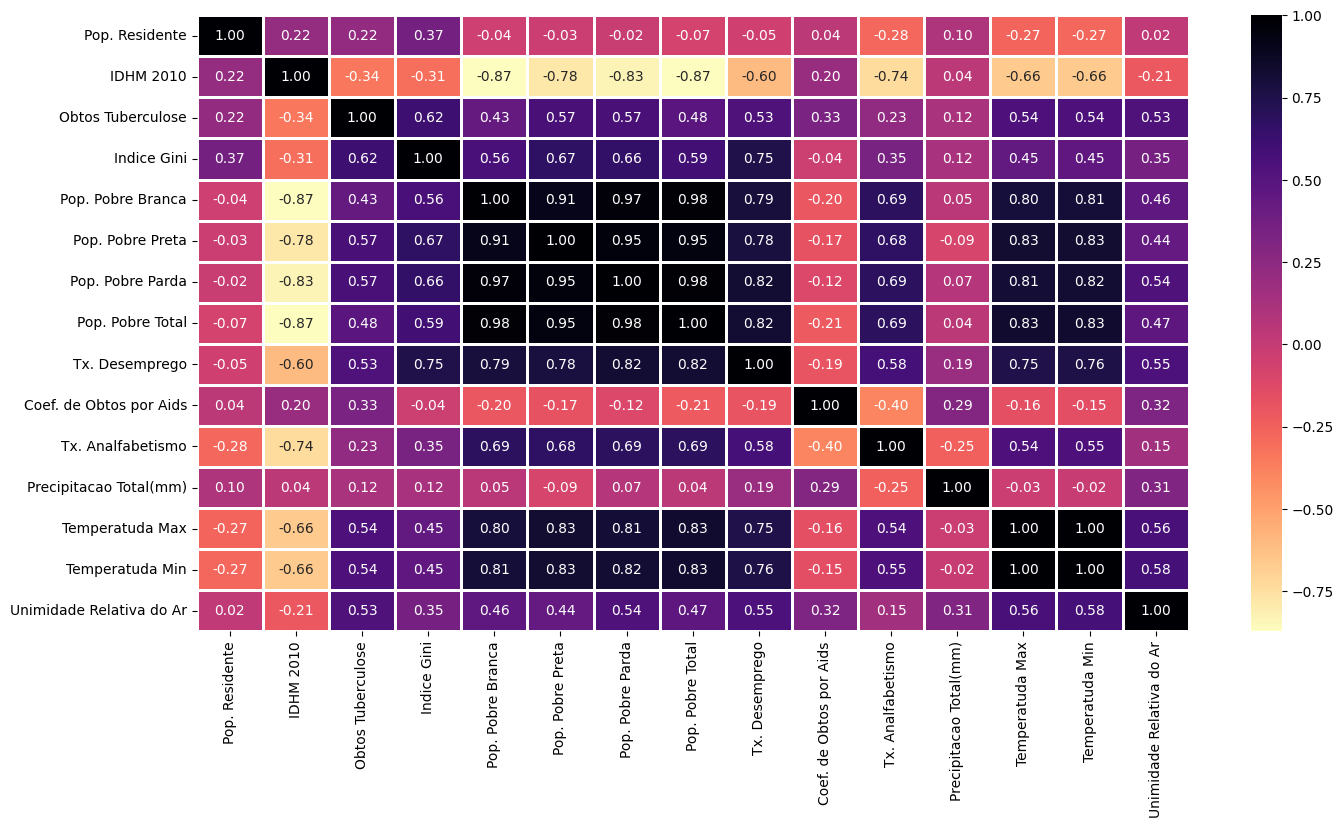

In [18]:
plt.figure(figsize=(16, 8))

sns.heatmap(dataframe.corr(),
            cmap = 'magma_r',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

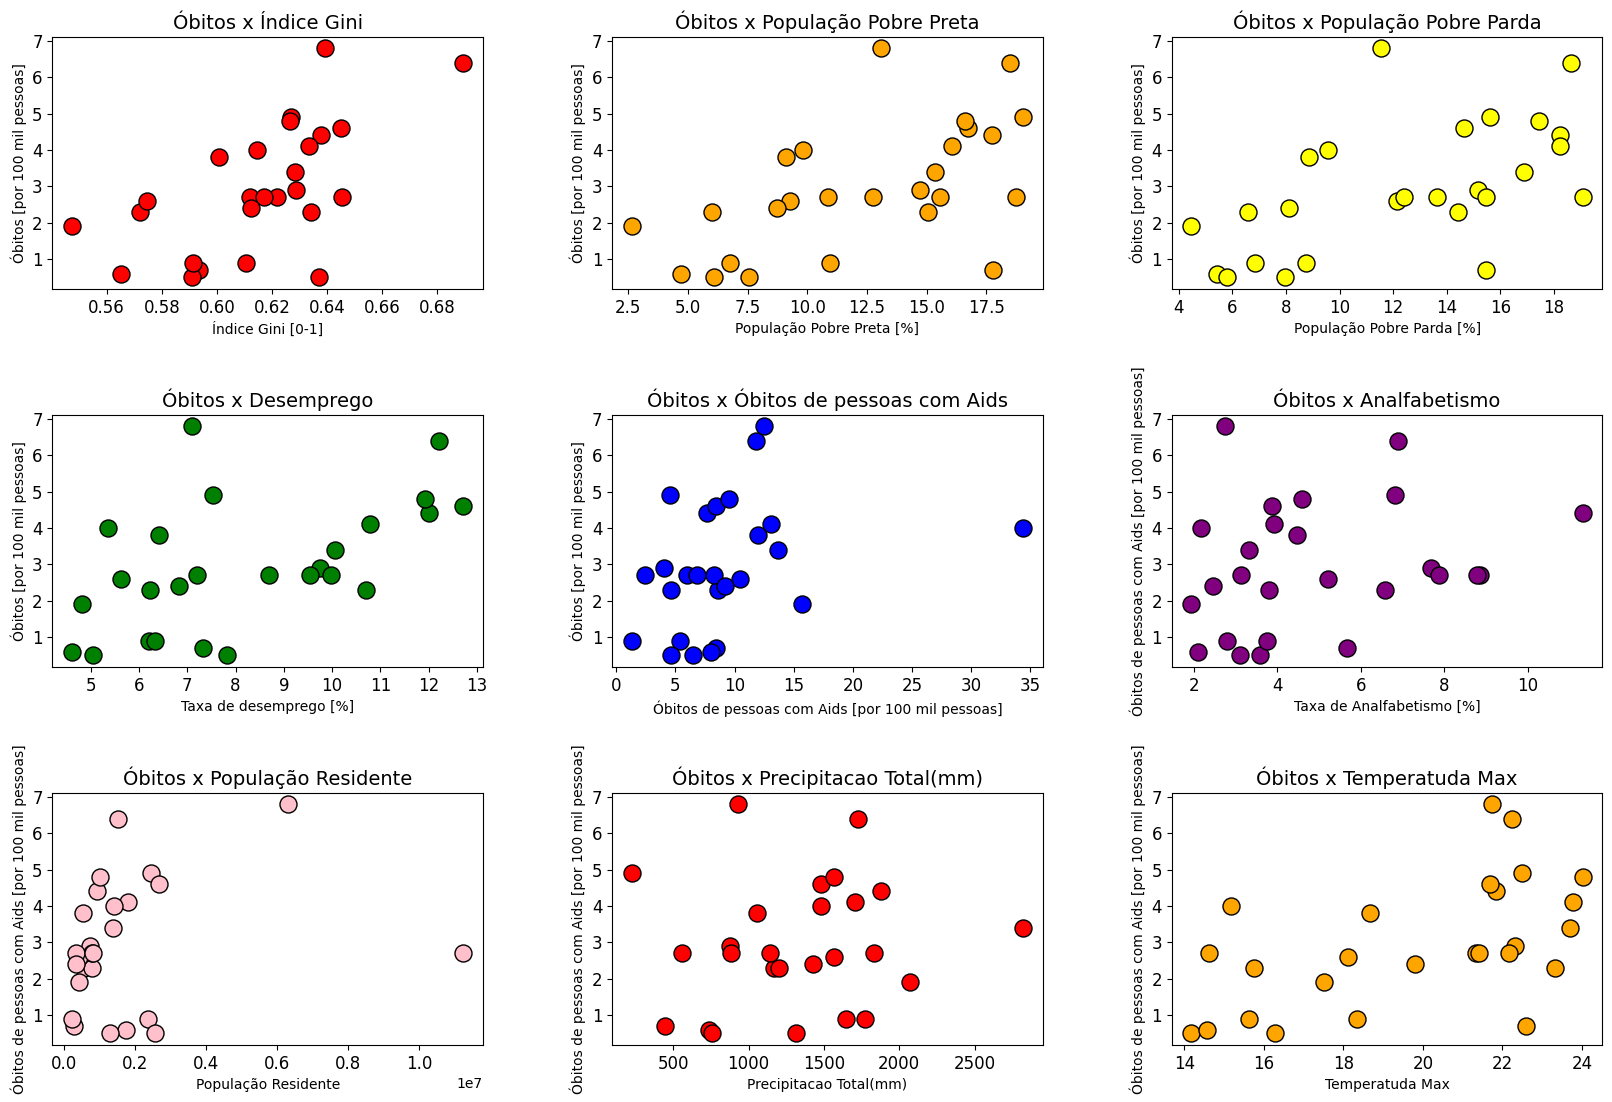

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dataframe is your DataFrame

plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(431)
plt.scatter(dataframe['Indice Gini'], dataframe['Obtos Tuberculose'], color='red', edgecolor='k', s=150)
plt.title('Óbitos x Índice Gini', fontsize=14)
plt.xlabel('Índice Gini [0-1]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter1.png')

plt.subplot(432)
plt.scatter(dataframe['Pop. Pobre Preta'], dataframe['Obtos Tuberculose'], color='orange', edgecolor='k', s=150)
plt.title('Óbitos x População Pobre Preta', fontsize=14)
plt.xlabel('População Pobre Preta [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter2.png')

plt.subplot(433)
plt.scatter(dataframe['Pop. Pobre Parda'], dataframe['Obtos Tuberculose'], color='yellow', edgecolor='k', s=150)
plt.title('Óbitos x População Pobre Parda', fontsize=14)
plt.xlabel('População Pobre Parda [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter3.png')

plt.subplot(434)
plt.scatter(dataframe['Tx. Desemprego'], dataframe['Obtos Tuberculose'], color='green', edgecolor='k', s=150)
plt.title('Óbitos x Desemprego', fontsize=14)
plt.xlabel('Taxa de desemprego [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter4.png')

plt.subplot(435)
plt.scatter(dataframe['Coef. de Obtos por Aids'], dataframe['Obtos Tuberculose'], color='blue', edgecolor='k', s=150)
plt.title('Óbitos x Óbitos de pessoas com Aids', fontsize=14)
plt.xlabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter5.png')

plt.subplot(436)
plt.scatter(dataframe['Tx. Analfabetismo'], dataframe['Obtos Tuberculose'], color='purple', edgecolor='k', s=150)
plt.title('Óbitos x Analfabetismo', fontsize=14)
plt.xlabel('Taxa de Analfabetismo [%]', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(437)
plt.scatter(dataframe['Pop. Residente'], dataframe['Obtos Tuberculose'], color='pink', edgecolor='k', s=150)
plt.title('Óbitos x População Residente', fontsize=14)
plt.xlabel('População Residente', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(438)
plt.scatter(dataframe['Precipitacao Total(mm)'], dataframe['Obtos Tuberculose'], color='red', edgecolor='k', s=150)
plt.title('Óbitos x Precipitacao Total(mm)', fontsize=14)
plt.xlabel('Precipitacao Total(mm)', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(439)
plt.scatter(dataframe['Temperatuda Max'], dataframe['Obtos Tuberculose'], color='orange', edgecolor='k', s=150)
plt.title('Óbitos x Temperatuda Max', fontsize=14)
plt.xlabel('Temperatuda Max', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')


plt.show()




- ### Separando entre treino e teste:

In [20]:
dataframe_final = dataframe.copy()

In [21]:
dataframe_final

,Pop. Residente,IDHM 2010,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatuda Max,Temperatuda Min,Unimidade Relativa do Ar
13,571149.0,0.770,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59,1170.6,23.331515,22.472008,79.529952
15,2375151.0,0.810,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,14.515712,68.094430
4,1393399.0,0.746,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31,2821.8,23.709100,22.806471,80.441066
3,284313.0,0.752,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66,447.0,22.601384,21.546440,72.465063
25,2570160.0,0.824,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59,1312.4,14.177881,13.147493,64.439188
22,786797.0,0.784,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80,1202.6,15.751587,14.821068,64.537769
23,551098.0,0.785,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46,1056.4,18.660191,17.450949,65.062221
19,1751907.0,0.823,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09,737.8,14.570580,13.356114,76.032490
20,421240.0,0.847,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94,2073.2,17.522570,16.656289,79.612737
8,2452185.0,0.754,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82,224.0,22.491734,21.543644,69.870316


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dataframe_final.drop(['Obtos Tuberculose'], axis=1)
Y = dataframe_final['Obtos Tuberculose']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

1.4256051896593702


# Pergunta

Com base no arquivo de 2008, a gente vê se aqueles fatores ainda estão influenciando em 2010


### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas